In [1]:
import pandas as pd
import numpy as np
filename = "https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/automobileEDA.csv"

In [2]:
df = pd.read_csv(filename)
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [6]:
%%capture
! pip install seaborn

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
#Find the correlation between the following columns: bore, stroke,compression-ratio , and horsepower.
df[['bore','stroke','compression-ratio','horsepower']].corr()

,bore,stroke,compression-ratio,horsepower
bore,1.000000,-0.055390,0.001263,0.566936
stroke,-0.055390,1.000000,0.187923,0.098462
compression-ratio,0.001263,0.187923,1.000000,-0.214514
horsepower,0.566936,0.098462,-0.214514,1.000000


(0, 53417.576741368444)

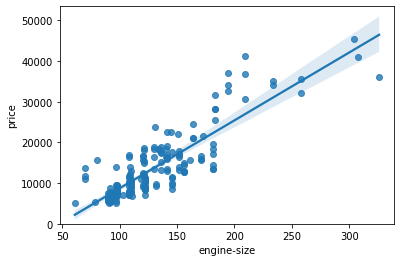

In [15]:
# Engine size as potential predictor variable of price
sns.regplot(df['engine-size'], df['price'])
plt.ylim(0,)

In [16]:
#examining the correlation between engine size and price
df[['engine-size','price']].corr()

,engine-size,price
engine-size,1.000000,0.872335
price,0.872335,1.000000


,highway-mpg,price
highway-mpg,1.000000,-0.704692
price,-0.704692,1.000000


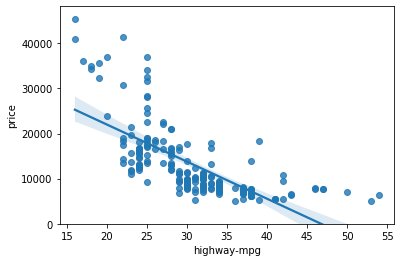

In [19]:
sns.regplot(df['highway-mpg'],df['price'])
plt.ylim(0,)#limits the y axis to starting from 0
df[['highway-mpg','price']].corr()

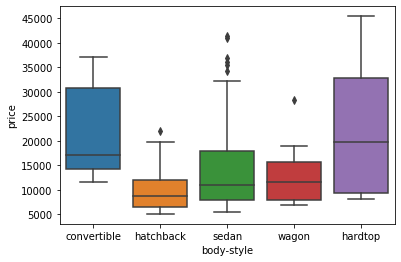

In [20]:
sns.boxplot(df['body-style'],df['price'])
#use box plot to visualize categorical variables 

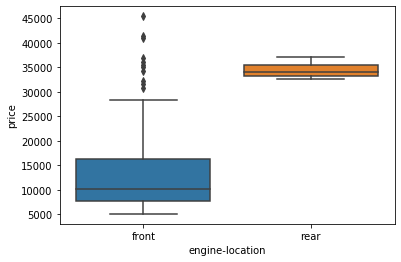

In [21]:
sns.boxplot(df['engine-location'], df['price'])

In [23]:
df.describe(include= 'object')

,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,horsepower-binned
count,201,201,201,201,201,201,201,201,201,200
unique,22,2,2,5,3,2,6,7,8,3
top,toyota,std,four,sedan,fwd,front,ohc,four,mpfi,Low
freq,32,165,115,94,118,198,145,157,92,115


In [88]:
#use value counts to find out how frequent a value occurs
dwc = df['drive-wheels'].value_counts().to_frame()

In [89]:
dwc.rename(columns={'drive-wheels':'values-count'}, inplace=True)
dwc.index.name="drivers-wheel"
dwc

,values-count
drivers-wheel,
fwd,118
rwd,75
4wd,8


In [43]:
df['drive-wheels'].unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

In [61]:
#group the drive wheel, body style and price
group1 = df[['drive-wheels','body-style','price']]
groupy = group1.groupby(['drive-wheels','body-style'], as_index=False).mean()
groupy

,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


In [69]:
group_pivot = groupy.pivot(index = 'drive-wheels', columns='body-style').fillna(0)
group_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  0.0      0.000000   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

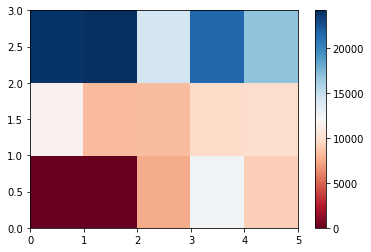

In [72]:
plt.pcolor(group_pivot, cmap='RdBu')
plt.colorbar()
plt.show()

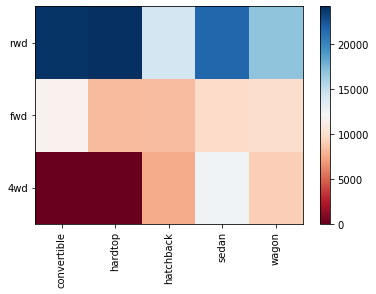

In [80]:
fig, ax = plt.subplots()
im = ax.pcolor(group_pivot, cmap='RdBu')

#label names
row_labels = group_pivot.columns.levels[1]
col_labels = group_pivot.index

#move ticks and labels to the center
ax.set_xticks(np.arange(group_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(group_pivot.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#rotate label if too long
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

In [85]:
from scipy import stats
#The pearson cofficent
pearson_coef, p_value= stats.pearsonr(df['horsepower'],df['price'])
print(pearson_coef, p_value)

0.8095745670036555 6.369057428261186e-48
